## Bank Churn Data Cleaning & EDA Notebook

In [2]:
#loading relevant python libraries

#data analysis
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

Let's begin by loading the data and reviewing the features

In [3]:
#loading data

df = pd.read_csv('Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7333,7334,15795527,Zetticci,699,Spain,Male,43,2,136487.86,2,1,0,82815.93,0


In [5]:
#run .describe() for a quick review of the contents of each columns/feature

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Columns/Features Summary** <br>
<br>
**-RowNumber-** Number allocated to orignal table's record, uneccessary for analysis, REMOVE<br>
**-CustomerId-** Number allocated to customer's profile, uneccessary for analysis, REMOVE<br>
**-Surname-** Customer's last name, uneccessary for analysis, REMOVE<br>
**-CreditScore-** Customer's Credit score at time of data pull, KEEP, INTEGER<br>
**-Geography-** Customer's country of residence at time of data pull, KEEP, STRING<br>
**-Gender-** Customer's gender, KEEP, STRING<br>
**-Age-** Customer's age, KEEP, INTEGER<br>
**-Tenure-** Length of time customer has been a customer of the business, KEEP, INTEGER<br>
**-Balance-** Customer's last balance at time of data pull, KEEP, FLOAT<br>
**-NumOfProducts-** Number of products the customer has purchased from the business, KEEP, INTEGER<br>
**-HasCrCard-** Binary idicator tracking if the customer has opened a line of credit with the business, KEEP, INTEGER<br>
**-IsActiveMember-** Binary idicator tracking if the customer has transaction history with the bank, KEEP, INTEGER<br>
**-EstimatedSalary-** Customer's Estimated Salary, KEEP, FLOAT<br>
**-Exited-** Binary idicator tracking if the customer has terminated their business with the bank, KEEP, INTEGER, **TARGET**

In [6]:
#remove uninformitive columns

df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [7]:
#check for na values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


It appears that each record contains all feature data so we will not need to drop/impute values and can move on to EDA

To start lets explore the number of customers that fall within our target cohorts.

In [8]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Of the 10000 customer records, approximately 20% have already Exited business the Bank. As we move into visualizing the paramaters in relations to these cohorts we will explore if the distributions of continous variables.

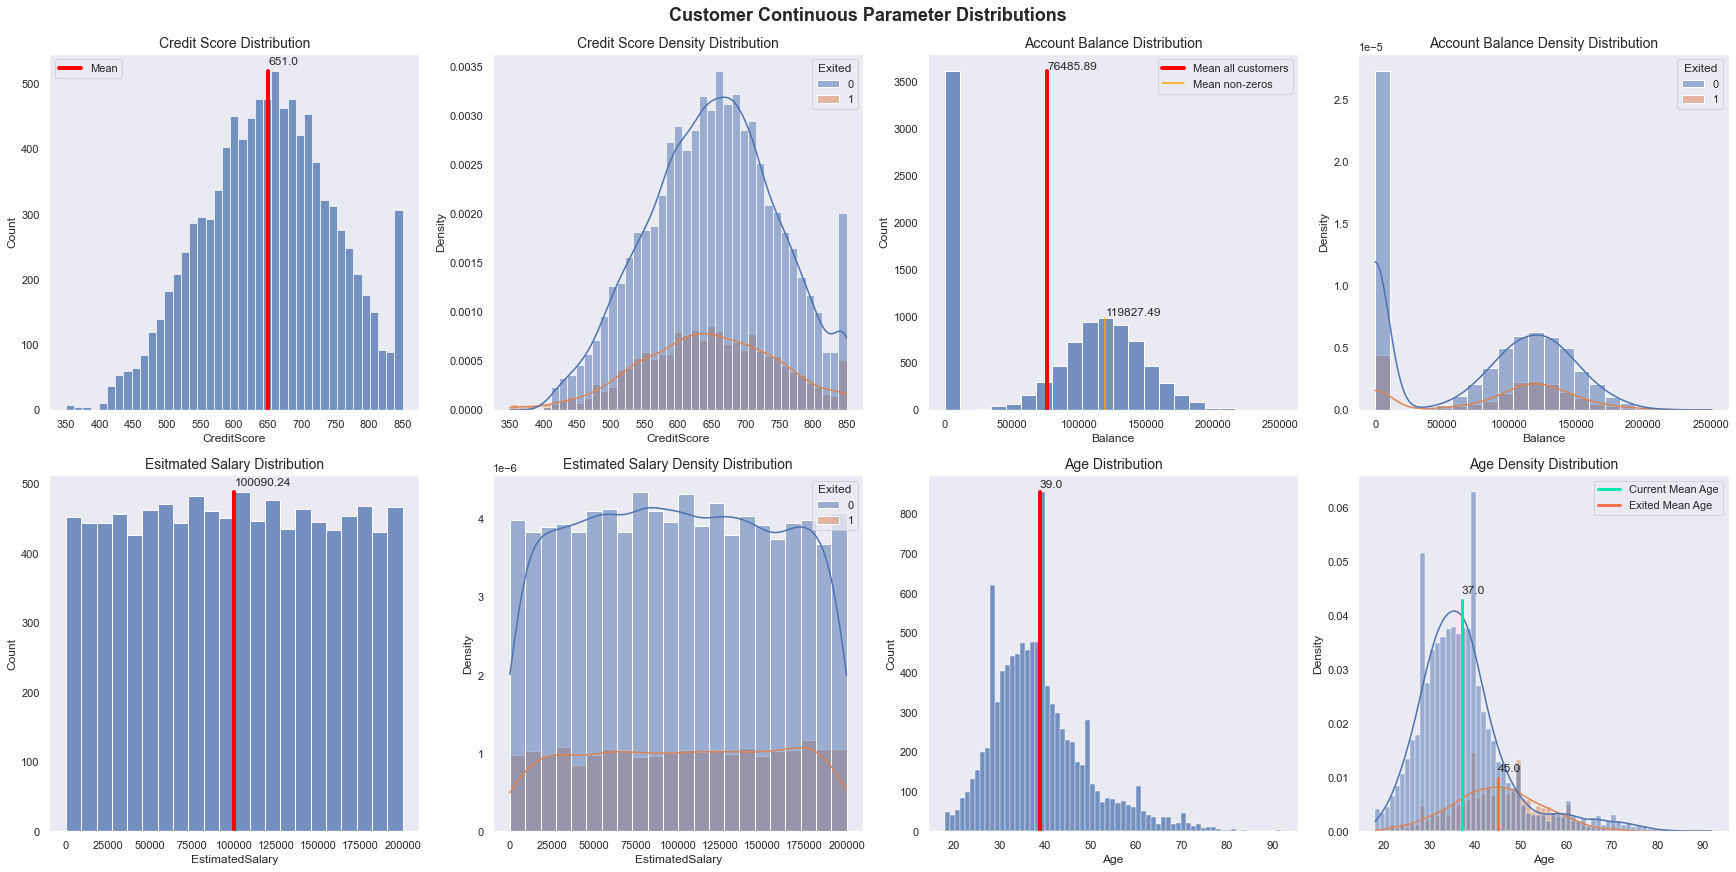

In [9]:
#plot the histograms for the continous parameters

#create helper function to capture heights of histogram bars
def make_heights_list(ax):
    heights = []
    for p in ax.patches:
        heights.append(p.get_height())
    heights.sort()
    return heights

sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(2,4, figsize=(24,12), constrained_layout=True)
fig.suptitle("Customer Continuous Parameter Distributions", fontsize=18, weight='bold') 


sns.histplot(ax=axes[0,0], data=df.CreditScore)
plt.sca(axes[0,0])
plt.xticks([x for x in range(349,851) if x%50==0])
heights = make_heights_list(axes[0,0])
line1= plt.axvline(df.CreditScore.mean(), 0, heights[-1]/axes[0,0].get_ylim()[1], color='red', linewidth=4)
plt.text(df.CreditScore.mean(), heights[-1]+10, str(round(df.CreditScore.mean(),0)))
plt.legend((line1,),('Mean',), loc=2)
plt.grid(False)
plt.title("Credit Score Distribution", size=14)



sns.histplot(ax=axes[0,2],data=df.Balance)
plt.sca(axes[0,2])
heights = make_heights_list(axes[0,2])
line2=plt.axvline(df.Balance.mean(), 0, heights[-1]/axes[0,2].get_ylim()[1], color='red',linewidth=4)
line3=plt.axvline(df[df['Balance'] > 1].Balance.mean(), 0, heights[-2]/axes[0,2].get_ylim()[1], color='orange')
plt.text(df[df['Balance'] > 1].Balance.mean(),(heights[-2]+20), str(round(df[df['Balance'] > 1].Balance.mean(),2)))
plt.text(df.Balance.mean(),(heights[-1]+10), str(round(df.Balance.mean(),2)))

plt.legend((line2,line3),('Mean all customers', 'Mean non-zeros'), loc=1)
plt.grid(False)
plt.title("Account Balance Distribution", size=14)



sns.histplot(ax=axes[0,1], data=df, x=df.CreditScore, hue=df.Exited, stat="density",kde=True)
plt.sca(axes[0,1])
plt.xticks([x for x in range(349,851) if x%50==0])
plt.grid(False)
plt.title("Credit Score Density Distribution", size=14)


sns.histplot(ax=axes[0,3],data=df, x=df.Balance, hue=df.Exited, stat="density",kde=True)
plt.sca(axes[0,3])
plt.grid(False)
plt.title("Account Balance Density Distribution", size=14)



sns.histplot(ax=axes[1,0],data=df.EstimatedSalary)
plt.sca(axes[1,0])
heights = make_heights_list(axes[1,0])
plt.axvline(df.EstimatedSalary.mean(), 0 , heights[-1]/axes[1,0].get_ylim()[1], color='red',linewidth=4)
plt.text(df.EstimatedSalary.mean(), heights[-1]+10, str(round(df.EstimatedSalary.mean(),2)))
plt.grid(False)
plt.title("Esitmated Salary Distribution", size=14)


sns.histplot(ax=axes[1,2], data=df.Age)
plt.sca(axes[1,2])
heights = make_heights_list(axes[1,2])
plt.axvline(df.Age.mean(), 0 , heights[-1]/axes[1,2].get_ylim()[1], color='red',linewidth=4)
plt.text(df.Age.mean(), heights[-1]+10, str(round(df.Age.mean(),0)))
plt.grid(False)
plt.title("Age Distribution", size=14)



sns.histplot(ax=axes[1,1],data=df, x=df.EstimatedSalary, hue=df.Exited, stat="density",kde=True)
plt.sca(axes[1,1])
plt.grid(False)
plt.title("Estimated Salary Density Distribution", size=14)


sns.histplot(ax=axes[1,3], data=df, x=df.Age, hue=df.Exited, stat="density", kde=True)
plt.sca(axes[1,3])
plt.grid(False)
plt.title("Age Density Distribution", size=14)
exited_mean_age = df[df['Exited']==1]['Age'].mean()
current_mean_age = df[df['Exited']==0]['Age'].mean()
line4=plt.axvline(round(exited_mean_age,0), 0, .15, color="#ff704d",linewidth=3)
plt.text(round(exited_mean_age,0), .011, str(round(exited_mean_age,0)))
line5=plt.axvline(round(current_mean_age,0), 0, .65, color='#00e6ac',linewidth=3)
plt.text(round(current_mean_age,0), .044, str(round(current_mean_age,0)))
plt.legend((line5,line4),('Current Mean Age', 'Exited Mean Age'), loc=1);

#### Distribution Analysis

**Credit Score** - Normally distributed around score of 651, with slight difference in distribution of scores between customers that have exited the business vs those that have not. 

**Balance**  - The data is broken into two distinct groups. First, a portion that is normally distribution around 120K&euro; for both Exited and Current customers. The second group accounts for the 36% of dataset that show the customer's balance at zero during the time of the data pull. Between the Current and Exited cohorts, we find that 39% and 25% of the accounts within each cohort are currently zero. 

**Estimated Salary** - Uniformly distributed across the range of values. No dicernable difference between distribution when seperated by Current/Exited cohorts.

**Age** - Normally distributed around 39 years of age with right-hand or positive skew. When explored through the lense of our cohort analysis we see stronger normality in distriubtion of the Current customers' Ages, while the Exited customers are more evenly distributed by comparison. Additionally a difference of ~8 years can be observed between the mean Ages of each cohort.

In [10]:
#cohort_balance_check - exploring the number of account balances are zero and cross examining between Current and Exit cohorts

cbc = pd.DataFrame(data = df[["Exited","Balance"]], index=df.index)
cbc['Balance greater than zero'] = cbc['Balance'].apply(lambda x: 1 if x>0 else 0)
cbc.groupby('Exited')['Balance greater than zero'].value_counts()

Exited  Balance greater than zero
0       1                            4846
        0                            3117
1       1                            1537
        0                             500
Name: Balance greater than zero, dtype: int64

In [11]:
cbc2 = round(cbc[(cbc['Exited']==1) & (cbc['Balance greater than zero']==0)].shape[0]/cbc[cbc['Exited']==1].shape[0],2)
cbc1 = round(cbc[(cbc['Exited']==0) & (cbc['Balance greater than zero']==0)].shape[0]/cbc[cbc['Exited']==0].shape[0],2)

print("The percentage of Current accounts with a balance of zero is " + str(cbc1) + "\n" + "The percentage of Exited accounts with a balance of zero is " + str(cbc2))

The percentage of Current accounts with a balance of zero is 0.39
The percentage of Exited accounts with a balance of zero is 0.25


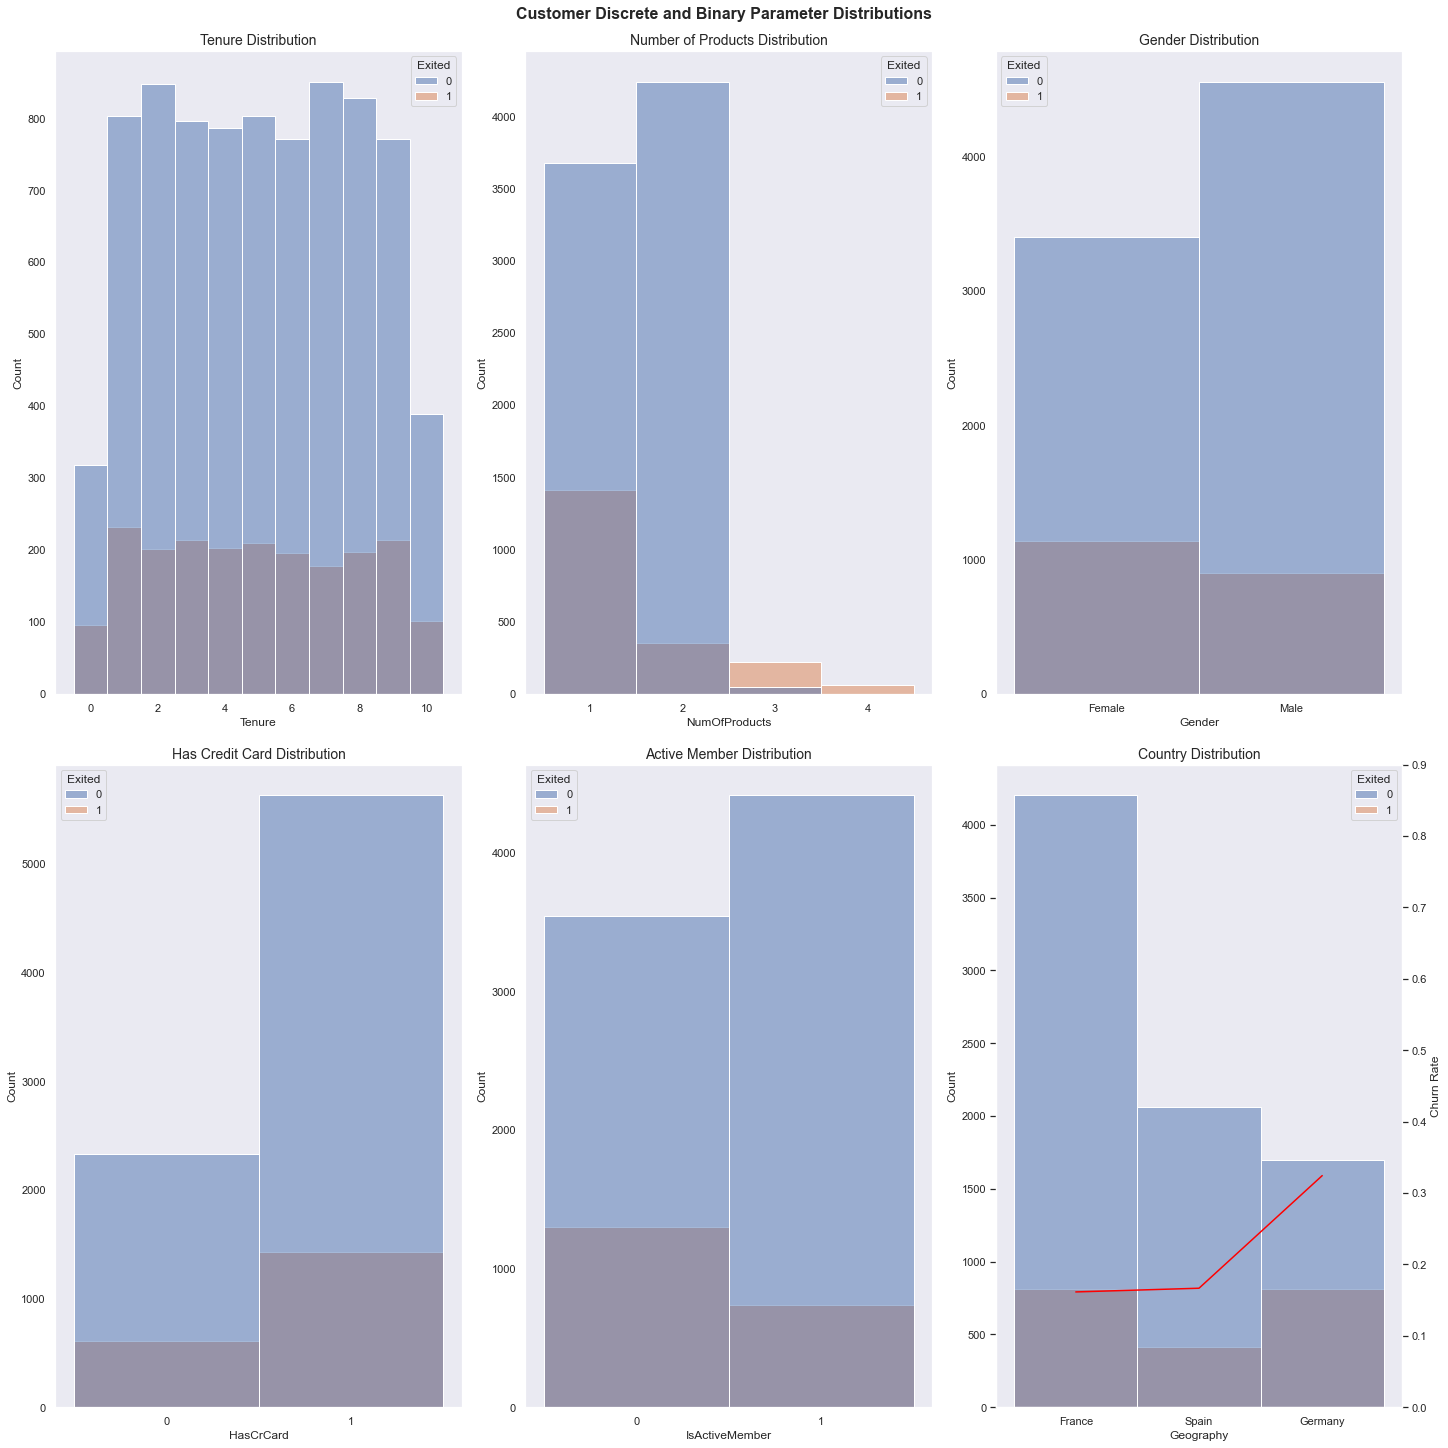

In [12]:
#plot the histograms for the continous parameters


sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(2, 3, figsize=(20,20), constrained_layout=True)
fig.suptitle("Customer Discrete and Binary Parameter Distributions", fontsize=16, weight='bold') 


sns.histplot(ax=axes[0,0], data=df, x=df.Tenure, discrete =True, hue=df.Exited)
plt.sca(axes[0,0])
plt.grid(False)
plt.title("Tenure Distribution", size=14)


sns.histplot(ax=axes[0,1],data=df, x=df.NumOfProducts,discrete =True, hue=df.Exited)
plt.sca(axes[0,1])
plt.grid(False)
plt.xticks([1,2,3,4])
plt.title('Number of Products Distribution', size =14)

sns.histplot(ax=axes[0,2],data=df, x=df.Gender,discrete =True, hue=df.Exited)
plt.sca(axes[0,2])
plt.grid(False)
plt.title('Gender Distribution', size =14)

sns.histplot(ax=axes[1,0],data=df, x=df.HasCrCard,discrete =True, hue=df.Exited)
plt.sca(axes[1,0])
plt.grid(False)
plt.xticks([0,1])
plt.title('Has Credit Card Distribution', size =14)

sns.histplot(ax=axes[1,1],data=df, x=df.IsActiveMember,discrete =True, hue=df.Exited)
plt.sca(axes[1,1])
plt.grid(False)
plt.xticks([0,1])
plt.title('Active Member Distribution', size =14)


churn_rate = df[df['Exited']==1].groupby(df.Geography)['Exited'].count()/df.groupby(df.Geography)['Exited'].count()
churn_rate_sort = churn_rate.sort_values()

sns.histplot(ax=axes[1,2],data=df, x=df.Geography, discrete =True, hue=df.Exited)
axes[1,2].grid(False)
axes[1,2].set_title('Country Distribution', size =14)
ax2 = axes[1,2].twinx()
ax2.set_ylabel('Churn Rate')
ax2 = sns.lineplot(data=churn_rate_sort,color='red')
ax2.grid(False)
ax2.set_yticks([i/100 for i in range(100) if i%10==0]);
#plt.grid(False)
#plt.title('Country Distribution', size =14)

#### Distribution Analysis

**Tenure** - The tenure distrubtion is mostly uniform across the range with slight outlyers at the extreme values of 0 and 10 years.

**Number of Products** - A very interesting divergence of in behaviour in the number of products reported by each cohort. The current customers are almost exclusivly users of 1 or 2 products with small margin differentiating those groups. While a majority of churned customers utlized a single products, they also ventured expanded into more mature buying profiles of 3 and 4 products.

**Gender** - Even distriubtion for churned customers, with an ~9% male skew for the customer base as a whole.

**Has Credit Card** -  Similiar distribution between cohorts with a 70/30 tendnecy to having a line of credit with the business.

**Is Active Member** - 10% skew for for active members to have account activity vs ~25% skew for churrned members to have NO account activity during their membership.

**Geography** - We see that approximately half the customer base resides in France with Spain and Germany representing about a quarter each. Among these groups we see the churn rate of French and Spanish clients hovering 18% while Germany reaching above 30%.

#### Correlation

It is important prior to constructing models that our features are checked for multicollinearity(high degree of correlation between two or more features. Existience of multicollinearity will compromise a model's stability i.e. the ability to show similiar performance results given novel data.

<AxesSubplot:>

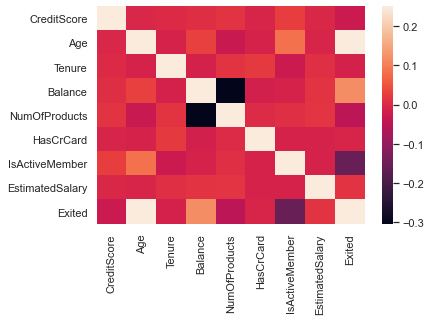

In [13]:
#graph a heatmap representing the correlation coefficent (in this case Pearson's) between feature pairs

sns.heatmap(df.corr(),vmax=.25)

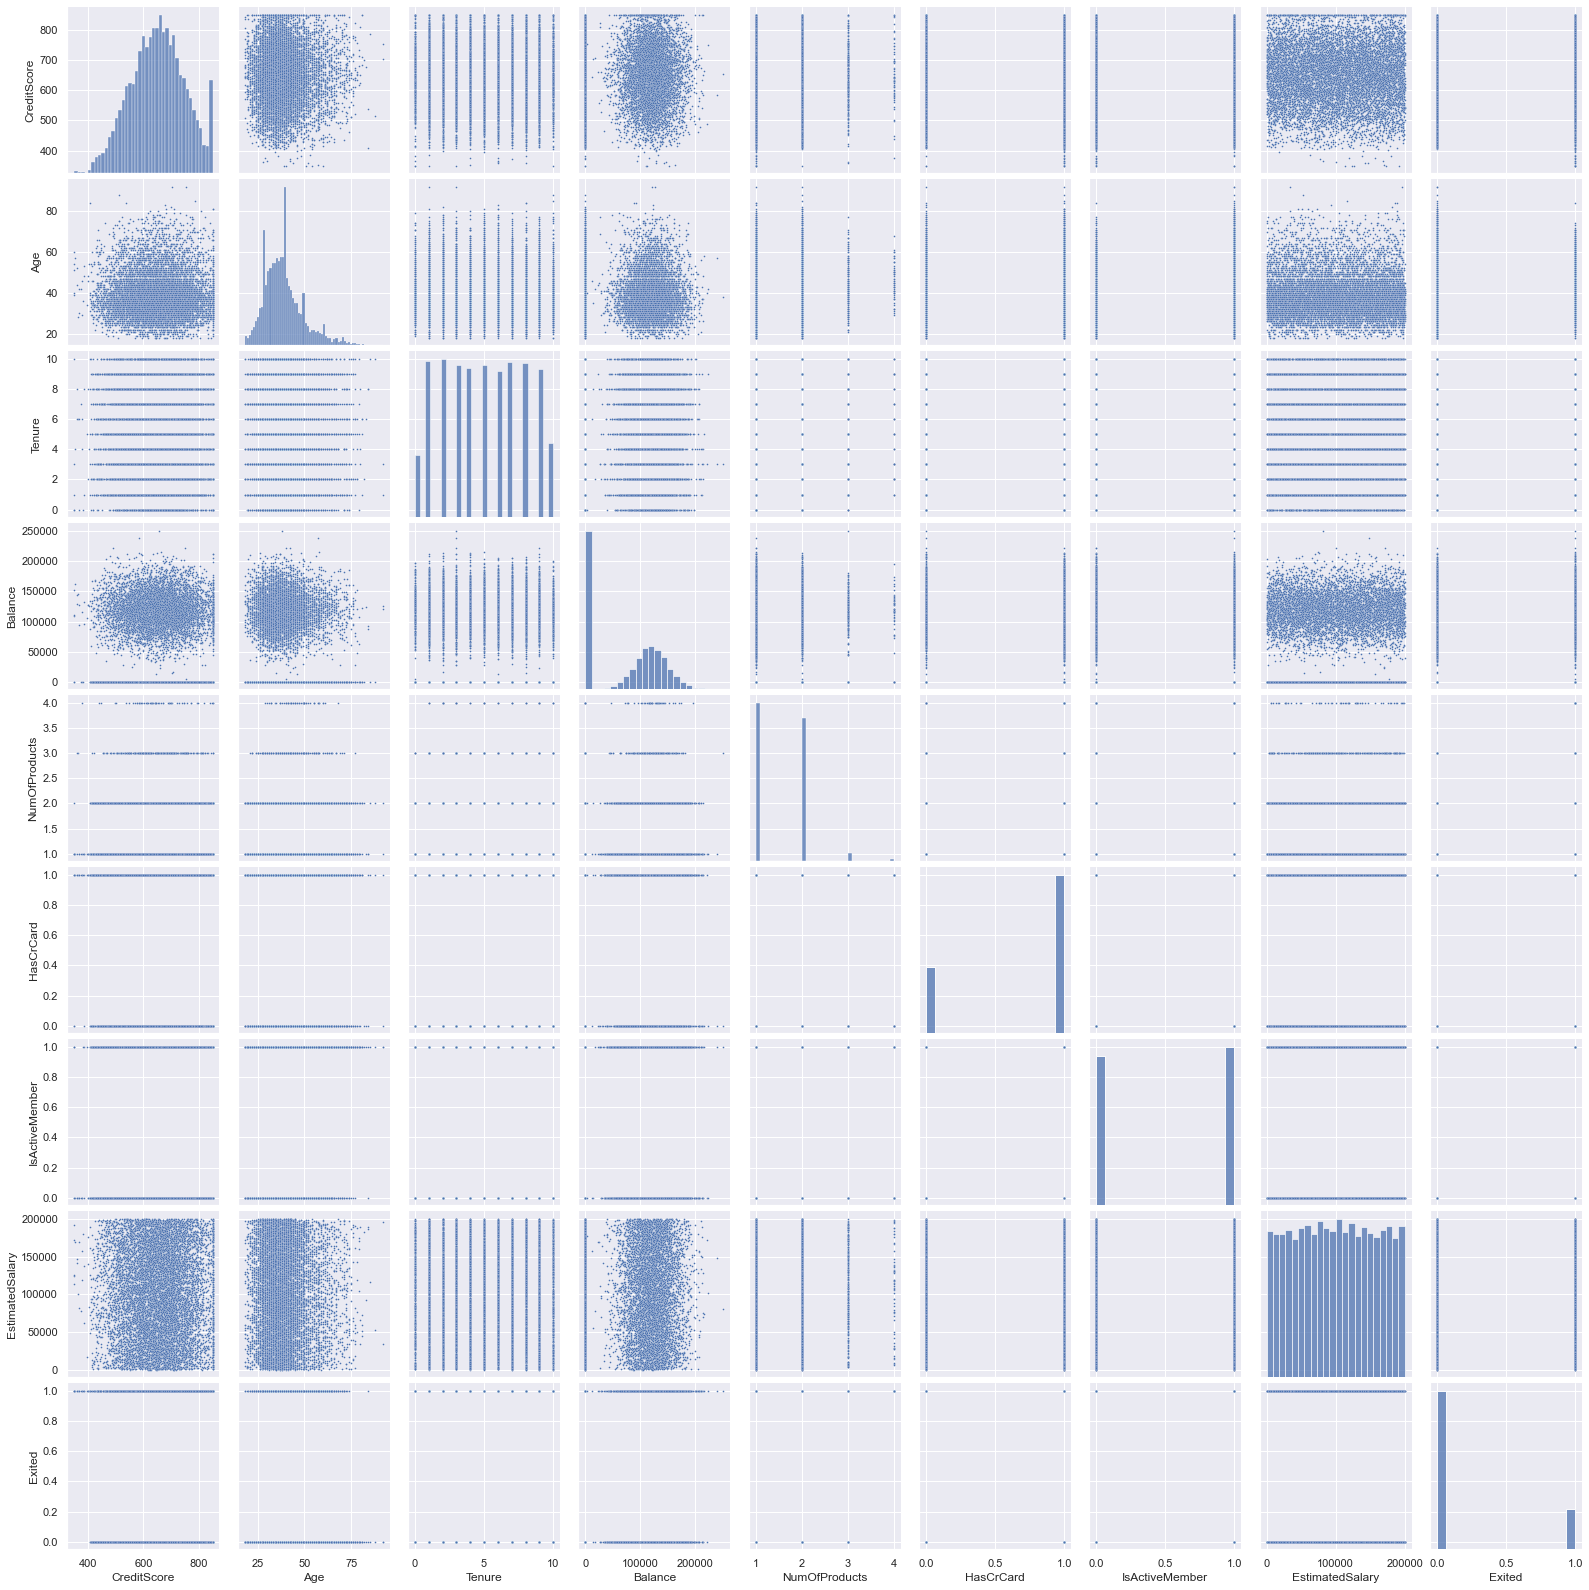

In [14]:
#graphing pairplot, pairwise distribution of data

sns.pairplot(df,plot_kws={"s": 3}, corner=False);

Review of the heatmap show weak correlations among the feature pairs within out dataset. Though when examined within the pairplots we see some distinct grouping of data when viewing the features paired with the Balance input (specifcially non-zero Balance datapoints).

Also we see the data's CreditScore distribution also has a degree of clustering when analyzed against Age and Estimated Salary.

We can explore this deeper using Variance Inflation Factor to determine the potential effect on a feature's variance if correlation with other features was actually 0. The higher the value, the more multicollinearity is embedded within that feature.

In [15]:
vif = pd.DataFrame()
cont_df = df.drop(['Geography','Gender'], axis=1)
vif["VIF Factor"] = [variance_inflation_factor(cont_df.values, i) for i in range(cont_df.shape[1])]
vif['Features'] = cont_df.columns
vif

,VIF Factor,Features
0,20.690979,CreditScore
1,13.606988,Age
2,3.866685,Tenure
3,2.651487,Balance
4,7.705552,NumOfProducts
5,3.286672,HasCrCard
6,2.150729,IsActiveMember
7,3.885184,EstimatedSalary
8,1.435330,Exited


As indicated in the above dataframe, CreditScore and Age appear to have high degrees of multicollinearity with other featuers in our dataset. This stands to reason as factors such as Credit Score evaluation takes length of credit history or % of Credit spent (proxy for income estimate) into account.

As we move into the preprocessing step, we will have to take step(s) to remove/amend the data in order to account for this aspect of the dataset.

In [16]:
df.to_csv('Cleaned_Df.csv', index=False)

In [44]:
(df.groupby('Exited')['Balance'].mean()[1] - df.groupby('Exited')['Balance'].mean()[0])/df.groupby('Exited')['Balance'].mean(0)

Exited
0    0.252432
1    0.201553
Name: Balance, dtype: float64

In [56]:
df[df['HasCrCard']==1].groupby('Exited')['CreditScore'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,5631.0,651.616054,95.712441,405.0,586.0,653.0,717.0,850.0
1,1424.0,644.540730,100.176372,350.0,580.0,646.0,716.0,850.0


# Determining Revenue Streams

* Banking Fees
    * Difficult to directly eastablish in the context of the provided data
* Merchant side transaction fees
    * HasCard as proxy
* Spread on loans vs savings interest
    * Amount of raw cast

In [52]:
df.groupby('Exited').Balance.describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


In [54]:
df.groupby('Exited').Balance.sum()/df.Balance.sum()

Exited
0    0.757356
1    0.242644
Name: Balance, dtype: float64

In [59]:
df.Age.std()

10.487806451704591